In [1]:
!pip3 install -U pip
!pip3 install -U setuptools wheel

# CPU version of pytorch has smaller footprint - see installation instructions in
# pytorch documentation - https://pytorch.org/get-started/locally/
!pip3 install torch==1.12+cpu torchvision==0.13.0+cpu torchtext==0.13.0 -f https://download.pytorch.org/whl/cpu/torch_stable.html

!pip3 install autogluon

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/15/aa/3f4c7bcee2057a76562a5b33ecbd199be08cdb4443a02e26bd2c3cf6fc39/pip-23.3.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 9.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.41.2
    Uninstalling wheel-0.41.2:
      Successfully uninstalled wheel-0.41.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.1.2
    Uninstalling setuptools-68.1.2:
      Successfully uninstalled setuptools-68.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages th

In [2]:
!pip install autogluon.tabular

In [3]:
from autogluon.tabular import TabularPredictor
import pandas as pd

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import pandas as pd
import json
from decimal import Decimal
from dateutil.parser import parse
from sklearn.model_selection import train_test_split
import re
import requests
from pathlib import Path
from tqdm import tqdm
import os
import multiprocessing
import time
from kaggle_secrets import UserSecretsClient
import subprocess

user_secrets = UserSecretsClient()
tqdm.pandas()

pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_columns", None)

In [5]:
df = pd.read_csv("/kaggle/input/sale-data/preprocessing_data.csv")

In [6]:
df.head()

,price,date,property_type,bedrooms,bathrooms,tenure,key_features,description_text,council_tax,address,agent_name,agent_address,url,part,area
0,185000.0,2023-10-13,Terraced,3,1,Freehold,"['Oil Central Heating', 'Freehold Semi-Detache...",Spacious 3 Bedroom Semi-Detached property situ...,NaN,"Penllwyn Estate, Capel Bangor, Aberystwyth","M S PROPERTIES (UK) LIMITED, Aberystwyth","23 Chalybeate Street,\r\nAberystwyth,\r\nSY23 1HX",https://www.rightmove.co.uk/properties/8664108...,Mid Wales,Ceredigion
1,875000.0,2023-06-16,Detached,5,3,Freehold,"['** Iconic Victorian residence **', '** 5 Bed...",** Fully refurbished Victorian town house ** H...,Band: C,"Llanbadarn Road, Llanbadarn Fawr, Aberystwyth,...","Morgan & Davies, Aberaeron","4 Market Street,\r\nAberaeron,\r\nSA46 0AS",https://www.rightmove.co.uk/properties/1315985...,Mid Wales,Ceredigion
2,875000.0,2022-06-01,Detached,10,6,Freehold,"['EPC: E', 'Council Tax Band: F', 'Broadband-...","Windrush House, dating back to 1872, has under...",Band: F,"Windrush, Llanrhystud, Ceredigion.","Fine and Country West Wales, Aberystwyth",The Gallery\r\nStation Approach\r\nAlexandra R...,https://www.rightmove.co.uk/properties/8539838...,Mid Wales,Ceredigion
3,860000.0,2023-08-01,Detached,6,1,Freehold,['Handsome country house. Wealth of character ...,Handsome late Georgian country house enjoying ...,Band: G,"Llanilar, Aberystwyth, Ceredigion, SY23","Savills, Cardiff",2\r\nKingsway\r\nCardiff\r\nCF10 3FD,https://www.rightmove.co.uk/properties/1238905...,Mid Wales,Ceredigion
4,835000.0,2023-01-04,Detached,5,6,Freehold,['** Nothing Compares - Exclusive Seaside Prop...,Nothing Compares ! An exclusive seaside proper...,NaN,"Lewis Terrace, New Quay , SA45","Morgan & Davies, Aberaeron","4 Market Street,\r\nAberaeron,\r\nSA46 0AS",https://www.rightmove.co.uk/properties/1378149...,Mid Wales,Ceredigion


In [7]:
df.drop(columns=['key_features', 'address', 'agent_name', 'agent_address', 'url'], inplace=True)

In [8]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [9]:
df = df.astype(
    {
        "date": "datetime64[ns]",
        "property_type": "category",
        "tenure": "category",
        "council_tax": "category",
        "part": "category",
        "area": "category",
    }
)

In [10]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
predictor = TabularPredictor(label='price').fit(train_data=train_data)


No path specified. Models will be saved in: "AutogluonModels/ag-20240106_191920"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240106_191920"
=================== System

In [12]:
# Get the performance metrics for each model trained in AutoGluon
leaderboard = predictor.leaderboard(extra_info=True)
print(leaderboard)


                 model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order  num_features  num_models  num_models_w_ancestors  memory_size  memory_size_w_ancestors  memory_size_min  memory_size_min_w_ancestors  num_ancestors  num_descendants                  model_type             child_model_type stopping_metric                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  hyperparameters                    hyperparameters_fit                           

In [13]:
# Plot the performance of models over time
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2   0.080346    accuracy       1.099904  332.082363                0.005037          15.470161            2       True          9
1       NeuralNetTorch   0.059745    accuracy       0.054897   41.121878                0.054897          41.121878            1       True          8
2      NeuralNetFastAI   0.056036    accuracy       0.134943  132.147510                0.134943         132.147510            1       True          3
3     RandomForestGini   0.051916    accuracy       0.262197   47.314264                0.262197          47.314264            1       True          4
4       ExtraTreesGini   0.049032    accuracy       0.239968   42.920317                0.239968          42.920317            1       True          6
5       ExtraTreesEntr   0.04656

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.012360939431396786,
  'KNeighborsDist': 0.012360939431396786,
  'NeuralNetFastAI': 0.05603625875566543,
  'RandomForestGini': 0.0519159456118665,
  'RandomForestEntr': 0.04532344458178822,
  'ExtraTreesGini': 0.04903172641120725,
  'ExtraTreesEntr': 0.0465595385249279,
  'NeuralNetTorch': 0.059744540585084466,
  'WeightedEnsemble_L2': 0.08034610630407911},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNeighborsUnif'],
  'KNeighborsDist': ['KNeighborsDist'],
  'NeuralNetFastAI': ['NeuralNetFastAI'],
  'RandomForestGini': ['RandomForestGini'],
  'RandomForestEntr': ['Ra

In [14]:
# Get feature importance
feature_importance = predictor.feature_importance(train_data)
feature_importance

Computing feature importance via permutation shuffling for 9 features using 5000 rows with 5 shuffle sets...
	3507.54s	= Expected runtime (701.51s per shuffle set)
	2122.07s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
description_text,0.89520,0.002098,3.617455e-12,5,0.899519,0.890881
property_type,0.00240,0.000825,1.438494e-03,5,0.004098,0.000702
council_tax,0.00236,0.000555,3.414070e-04,5,0.003503,0.001217
bedrooms,0.00156,0.000817,6.485529e-03,5,0.003243,-0.000123
area,0.00108,0.000756,1.655924e-02,5,0.002637,-0.000477
part,0.00108,0.000986,3.524200e-02,5,0.003110,-0.000950
bathrooms,0.00096,0.000385,2.528794e-03,5,0.001752,0.000168
date,0.00072,0.000593,2.666913e-02,5,0.001942,-0.000502
tenure,0.00012,0.000228,1.522794e-01,5,0.000590,-0.000350


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
feature_importance_df = pd.DataFrame(feature_importance, index=['description_text', 'area', 'property_type', 'council_tax', 'bedrooms', 'tenure', 'bathrooms', 'date', 'part'])
feature_importance_df

,importance,stddev,p_value,n,p99_high,p99_low
description_text,0.89520,0.002098,3.617455e-12,5,0.899519,0.890881
area,0.00108,0.000756,1.655924e-02,5,0.002637,-0.000477
property_type,0.00240,0.000825,1.438494e-03,5,0.004098,0.000702
council_tax,0.00236,0.000555,3.414070e-04,5,0.003503,0.001217
bedrooms,0.00156,0.000817,6.485529e-03,5,0.003243,-0.000123
tenure,0.00012,0.000228,1.522794e-01,5,0.000590,-0.000350
bathrooms,0.00096,0.000385,2.528794e-03,5,0.001752,0.000168
date,0.00072,0.000593,2.666913e-02,5,0.001942,-0.000502
part,0.00108,0.000986,3.524200e-02,5,0.003110,-0.000950


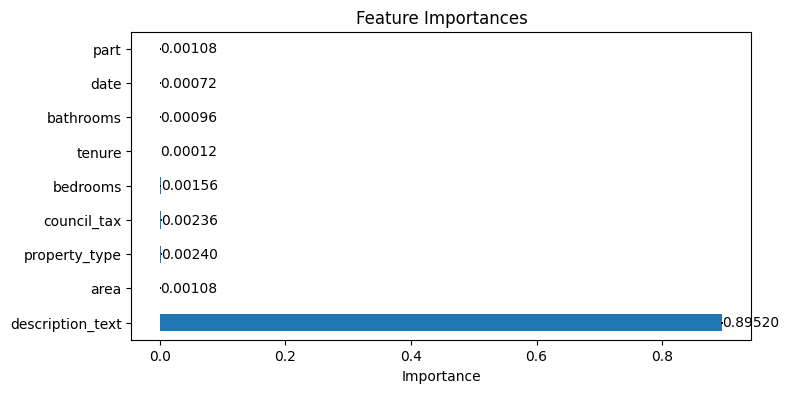

In [28]:

# Plotting feature importances
fig, ax = plt.subplots(figsize=(8, 4))
bar_plot = feature_importance_df['importance'].plot(kind='barh', xerr=feature_importance_df['stddev'], ax=ax)

# Adding numerical values on the bars
for i, val in enumerate(feature_importance_df['importance']):
    ax.text(val, i, f'{val:.5f}', va='center', color='black')

ax.set_xlabel('Importance')
ax.set_title('Feature Importances')
plt.show()


In [19]:
predictions_train = predictor.evaluate(train_data, silent=True)
predictions_train

{'accuracy': 0.8854903536977492,
 'balanced_accuracy': 0.46784456670494134,
 'mcc': 0.8845007404251252}

In [29]:
predictions_test = predictor.evaluate(test_data, silent=True)
predictions_test

{'accuracy': 0.07056743288860312,
 'balanced_accuracy': 0.050506364689092524,
 'mcc': 0.05815876331940045}

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats.stats import pearsonr
from sklearn.metrics import r2_score

In [22]:
yhat_train = predictor.predict(train_data.drop(columns=['price']))
yhat_test = predictor.predict(test_data.drop(columns=['price']))

In [23]:
print('Train dataset R-square:', r2_score(train_data['price'], yhat_train))
print('Test dataset R-square:', r2_score(test_data['price'], yhat_test))

print('Train dataset MSE:', mean_squared_error(train_data['price'], yhat_train))
print('Test dataset MSE:', mean_squared_error(test_data['price'], yhat_test))

print('Train dataset MAE:', mean_absolute_error(train_data['price'], yhat_train))
print('Test dataset MAE:', mean_absolute_error(test_data['price'], yhat_test))



Train dataset R-square: 0.961082079717215
Test dataset R-square: 0.6935079038671897
Train dataset MSE: 923797463.6438103
Test dataset MSE: 7036770083.677383
Train dataset MAE: 6939.4372990353695
Test dataset MAE: 54505.430477415204


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

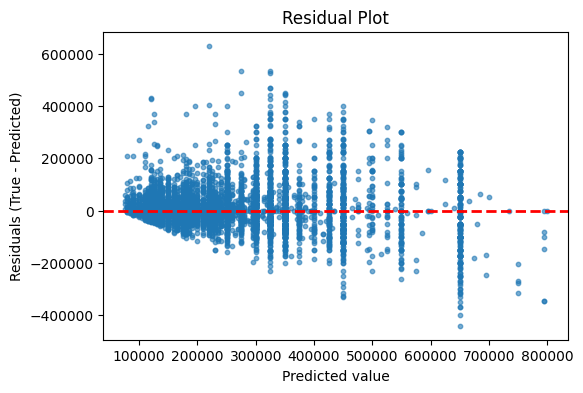

In [25]:
# Calculate residuals
residuals = test_data['price'] - yhat_test

# Create a residual plot
plt.figure(figsize=(6, 4))
plt.scatter(yhat_test, residuals, s=10, alpha=0.6)
plt.xlabel('Predicted value')
plt.ylabel('Residuals (True - Predicted)')
plt.axhline(0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Residual Plot')

plt.show()

/tmp/ipykernel_42/195043915.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(train_data['price'], hist=False, color="r",
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_42/195043915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-

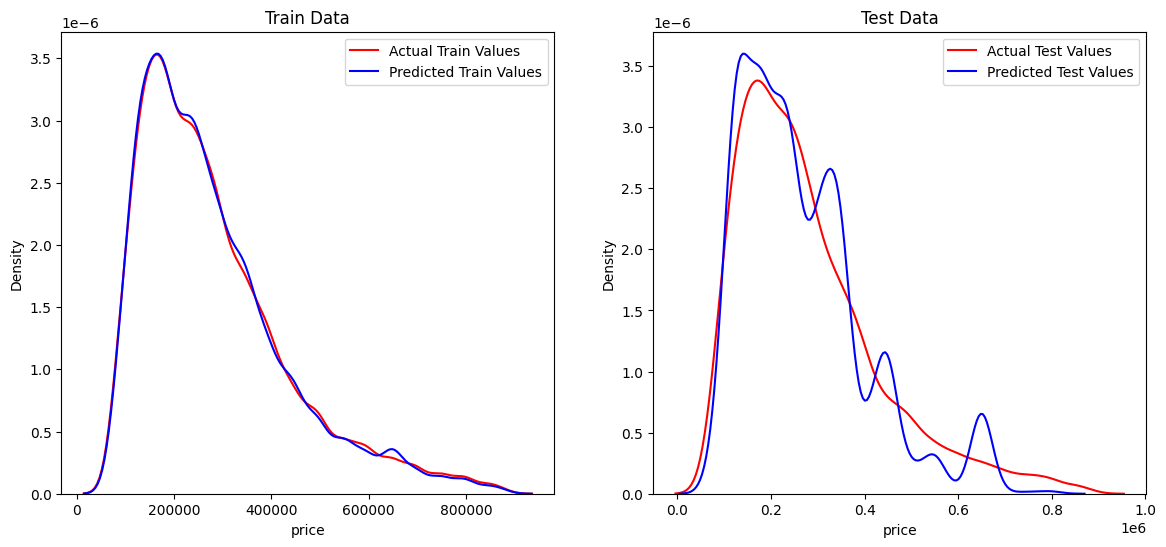

In [26]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(train_data['price'], hist=False, color="r", 
                   label="Actual Train Values")
sns.distplot(yhat_train, hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)
ax1.set_title('Train Data')
ax1.legend()

plt.subplot(1,2,2)
ax2 = sns.distplot(test_data['price'], hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(yhat_test, hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)
ax2.set_title('Test Data')
ax2.legend()

plt.show()